# Project: Bank Credit Card Default Prediction

## Problem Statement 

The banks with the intent of credit card were more focused on the number of customers using their credit service but the drawback of them not being able to pay back the credit in time was an issue that soon followed, a system was in need to effectively decide the credit limit to be allowed to a person based on his previous credit history. 

We are going to build a classification model using support vector classifier to predict the credibility of the customer, in order to minimize the risk and maximize the profit of a bank.

## Model Selection
We will Select the best model. Our Model selection will be based on Accuracy, Sensitivity & Specificity and area under the ROC curve.

## Expected Outcome
Higher accuracy in predicting the outcome using test data

# Loading Required Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Let's Check Out the Data

In [4]:
df = pd.read_csv("BankCreditCard.csv")

In [5]:
#head command to see first 6 observations
df.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [92]:
#dimension of dataset
df.shape

(30000, 24)

In [96]:
#count of class of target variable
df.Default_Payment.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [6]:
#columns name
df.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

### Let's check data types of each column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

##### No missing value present in this dataset

### Remove "Customer ID" since all the values are unique and does not contribute any information for analysis

In [8]:
#Drop customer id column
df.drop("Customer ID", axis = 1, inplace = True)

# Exploratory Data Analysis

## Default Payment

In [9]:
#Counts each category  in default payment variable
df['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

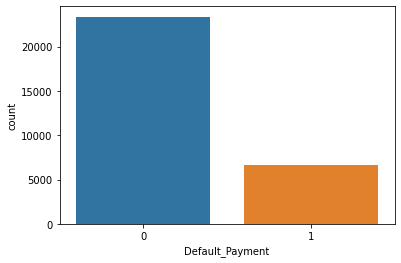

In [10]:
sns.countplot(x = "Default_Payment", data = df)
plt.show()

23364 observations are 0 where 0 means No and 6636 observations are 1 where 1 means Yes in the target variable

## Gender

In [11]:
df["Gender"].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

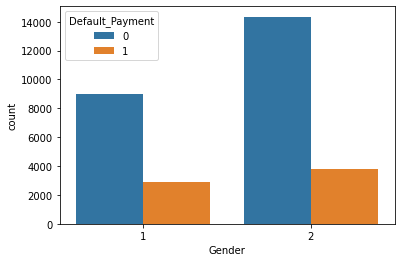

In [12]:
sns.countplot(x = "Gender", hue = "Default_Payment", data = df)
plt.show()

The number of female credit card holders are higher than the number of male credit card holders.

There are 11888 male and 18112 female credit card holders.

## Academic Qualification

In [13]:
df['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

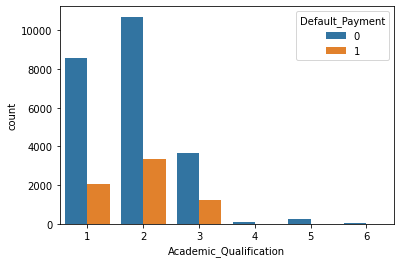

In [14]:
sns.countplot(x = "Academic_Qualification", hue = "Default_Payment", data = df)
plt.show()

- 1=Undergraduate
- 2=Graduate
- 3=Postgraduate
- 4=Professional
- 5=Others
- 6=Unknown.

The above plot shows most of the credit card holders are students.

## Marital 

In [15]:
df["Marital"].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

- 1=Married
- 2=Single
- 3=Do not prefer to say
- 0=No information

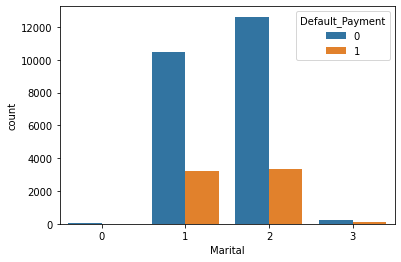

In [16]:
sns.countplot(x = "Marital", hue = "Default_Payment", data = df)
plt.show()

From the above plot we can say that most of the credit card holders are 'Single', followed by married credit card holders.

## Compare "Academic Qualification" and "Marital"

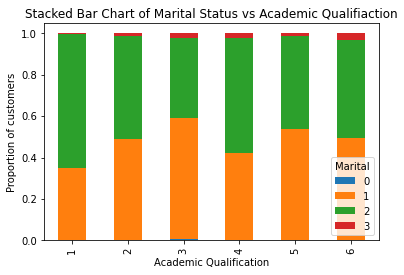

In [17]:
table=pd.crosstab(df.Academic_Qualification,df.Marital)
table.div(table.sum(1).astype(float), axis =0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Academic Qualifiaction')
plt.xlabel('Academic Qualification')
plt.ylabel('Proportion of customers')
plt.savefig("marital_vs_academic")

#### Marital

- 1=Married 
- 2=Single
- 3=Do not prefer to say
- 0=No information

#### Academic Qualification

- 1=Undergraduate
- 2=Graduate
- 3=Postgraduate
- 4=Professional
- 5=Others
- 6=Unknown

The bars represent the proportional marital status of the credit card holders. The x-axis represents customers with an academic qualification.

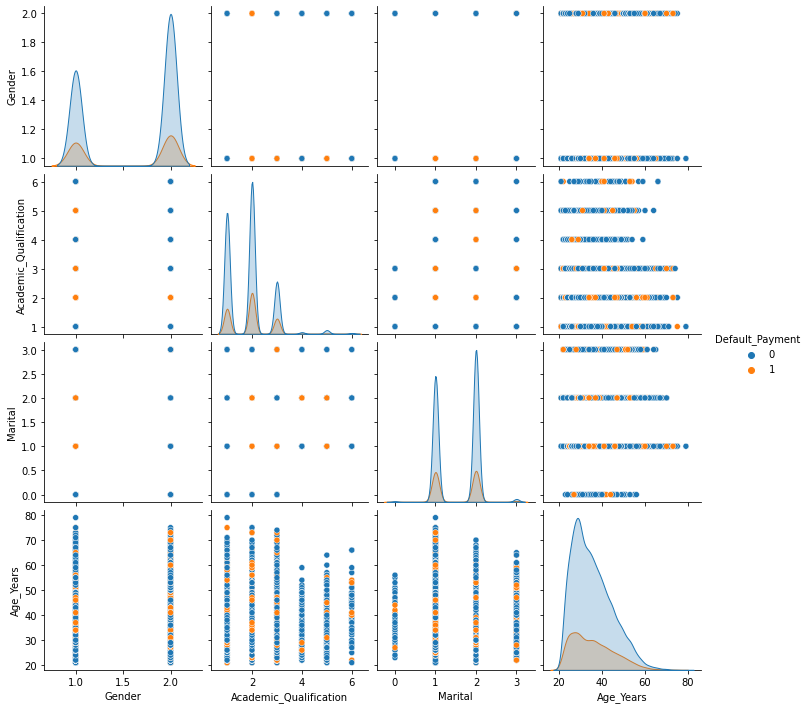

In [27]:
#pairs plot
sns.pairplot(df.iloc[:,[1,2,3,4,23]], diag_kind ="kde", hue ="Default_Payment")

## Correlation Matrix

<AxesSubplot:>

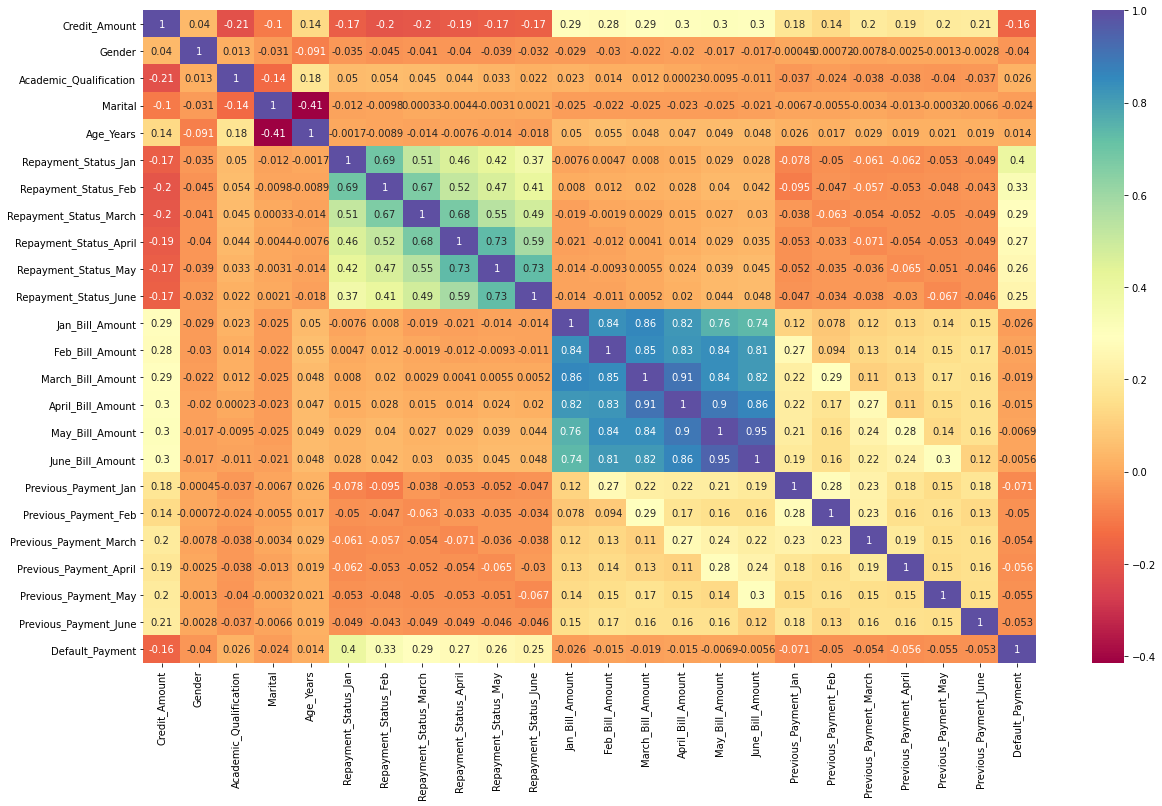

In [28]:
#calculating correlation  among numeric variable
corr_matrix = df.corr()

#plot correlation matrix
plt.figure(figsize=(20,12))
sns.heatmap(corr_matrix,
           cmap='Spectral',
           annot = True)

The above results shows all independents variables are slighty correlated with target variable. 

But independent variables have multicolinearity. For example: "March_Bill_Amount" is highly correlated with "Apil_Bill_Amount".

# Filtering the columns based correlation value

In [31]:
#Create empty array
columns = np.full((corr_matrix.shape[0],), True, dtype=bool)

#For loop to filter columns
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[0]):
        if corr_matrix.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
                
# Selected column store into a variable
selected_columns = df.columns[columns]
df_with_filtered_columns = df[selected_columns]

In [33]:
df_with_filtered_columns.columns

Index(['Credit_Amount', 'Gender', 'Academic_Qualification', 'Marital',
       'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'May_Bill_Amount',
       'Previous_Payment_Jan', 'Previous_Payment_Feb',
       'Previous_Payment_March', 'Previous_Payment_April',
       'Previous_Payment_May', 'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

# Splitting the dataset into input and output

In [34]:
X = df_with_filtered_columns.drop('Default_Payment', axis = 1)
Y = df_with_filtered_columns.loc[:,'Default_Payment']

# Standardizing input variables

In [35]:
from sklearn.preprocessing import StandardScaler

sc_x= StandardScaler()
x_std = sc_x.fit_transform(X)

# Implementing support vector classifier

#### Splittig input data into training dataset and testing dataset

In [36]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x_std, Y,
                                                    test_size=0.3,random_state=0,stratify=Y)

# Linear Kernel

### Create the support vector classifier model

In [38]:
from sklearn.svm import SVC  #Support Vector Classifier

In [39]:
linear_svc = SVC(kernel='linear', C =1.0, random_state=42)

# Training the model

In [40]:
linear_svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

In [41]:
linear_svc.support_vectors_

array([[ 0.35591432,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.11149369, -0.12046364],
       [ 0.4315078 ,  0.81016074, -1.07748156, ..., -0.29980379,
        -0.30967814, -0.29338206],
       [-1.23154867,  0.81016074,  0.18135662, ..., -0.24145308,
        -0.13309562, -0.12462628],
       ...,
       [-1.08036172,  0.81016074, -1.07748156, ..., -0.27056997,
        -0.28024772, -0.29338206],
       [ 0.05354042, -1.23432296, -1.07748156, ..., -0.00746558,
        -0.13309562, -0.29338206],
       [-0.77798782, -1.23432296,  1.4401948 , ..., -0.29980379,
        -0.30967814, -0.29338206]])

# Making Predictions

In [42]:
linear_svc_pred_test = linear_svc.predict(x_test)

In [43]:
linear_svc_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
print('Accuracy of support vector classifier on train set: {:.2f}'.format(linear_svc.score(x_train,y_train)))

Accuracy of support vector classifier on train set: 0.82


In [45]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(linear_svc.score(x_test,y_test)))

Accuracy of support vector classifier on test set: 0.82


# Evaluating the Algorithm

### Confusion Matrix

In [46]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, linear_svc_pred_test)
print(confusion_matrix)

[[6662  347]
 [1272  719]]


### Classification Report

In [47]:
#import classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, linear_svc_pred_test))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7009
           1       0.67      0.36      0.47      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



### ROC Curve

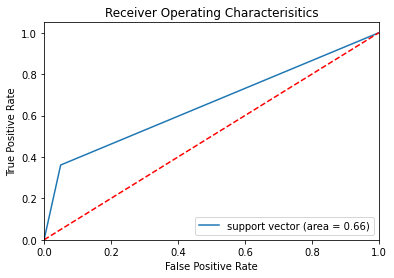

In [49]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,linear_svc_pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

#create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label = 'support vector (area = %0.2f)' % roc_auc)

#diagnol dotted red line
plt.plot([0,1], [0, 1], 'r--') #r for red and -- is for dashed line

#x-axis limitation
plt.xlim([0.0,1.0])

#y-axis limitation
plt.ylim([0.0,1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver Operating Characterisitics')

#print legend on lower right
plt.legend(loc="lower right")

#Save the plot as a image
plt.savefig('Log_ROC')

#print the plot
plt.show()

ROC curve is a plot of true positive rate versus false positive rate. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test, The area under the curve(AUC) is a measure of test accuracy. When AUC is 0.66, it means there is 66% chance that the model will be able to distinguish between positive class and negative class.

# Radial Basis Function Kernel

In [50]:
#SVC with RBF kernel
rbf_svc = SVC(kernel='rbf', gamma =0.7, C=1.0)

In [51]:
rbf_svc.fit(x_train,y_train)

SVC(gamma=0.7)

In [52]:
rbf_svc.support_vectors_

array([[ 1.26303604e+00,  8.10160740e-01,  1.81356620e-01, ...,
         2.18804189e-01, -1.31329791e-01,  1.22783874e+00],
       [ 3.55914324e-01,  8.10160740e-01, -1.07748156e+00, ...,
        -2.99803790e-01, -1.11493688e-01, -1.20463641e-01],
       [ 5.07101276e-01,  8.10160740e-01, -1.07748156e+00, ...,
         4.46875858e+00,  1.92196427e+01,  2.69249693e-01],
       ...,
       [-1.08036172e+00,  8.10160740e-01, -1.07748156e+00, ...,
        -2.70569970e-01, -2.80247720e-01, -2.93382058e-01],
       [ 5.35404199e-02, -1.23432296e+00, -1.07748156e+00, ...,
        -7.46558307e-03, -1.33095616e-01, -2.93382058e-01],
       [-7.77987816e-01, -1.23432296e+00,  1.44019480e+00, ...,
        -2.99803790e-01, -3.09678140e-01, -2.93382058e-01]])

# Making Predictions

In [53]:
pred_test = rbf_svc.predict(x_test)

In [54]:
print('Accuracy of support vector classifier on train set: {:.2f}'.format(rbf_svc.score(x_train,y_train)))

Accuracy of support vector classifier on train set: 0.88


In [55]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(rbf_svc.score(x_test,y_test)))

Accuracy of support vector classifier on test set: 0.80


# Evaluating the Algorithm

### Cross Validation

In [62]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#create a logistic regression model with SGD
modelCV = SVC(kernel='rbf', gamma=0.7, C=1.0)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, x_std, Y, cv=10, scoring = 'accuracy')
print("10-fold cross validation average accuarcy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuarcy: 0.800
[0.788      0.799      0.79333333 0.79       0.80033333 0.805
 0.812      0.802      0.81133333 0.80066667]


### Confusion Matrix

In [63]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6799  210]
 [1617  374]]


- True Negative is 6799 that means 6799 observation are correctly redicted as 0.

- False Positive is 210 that means 210 observations are wrongly predicted as 1.

- False Negative is 1617 that means 1617 observations are wrongly predicted as 0.

- True Positive is 374 that 374 observations are correctly predicted as 1.

### Classification Report

In [64]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7009
           1       0.64      0.19      0.29      1991

    accuracy                           0.80      9000
   macro avg       0.72      0.58      0.59      9000
weighted avg       0.77      0.80      0.75      9000



### ROC Curve

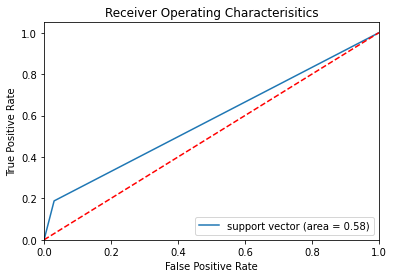

In [65]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

#create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label = 'support vector (area = %0.2f)' % roc_auc)

#diagnol dotted red line
plt.plot([0,1], [0, 1], 'r--') #r for red and -- is for dashed line

#x-axis limitation
plt.xlim([0.0,1.0])

#y-axis limitation
plt.ylim([0.0,1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver Operating Characterisitics')

#print legend on lower right
plt.legend(loc="lower right")

#Save the plot as a image
plt.savefig('Log_ROC')

#print the plot
plt.show()

# Training the model with grid search

### Hyperparameter Tuning for Best Parametrs

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
model_grid_search = SVC(kernel='rbf')

In [68]:
param_grid = {"C": [0.001, 0.01, 1, 10],
              "gamma": [0.0001, 0.001, 0.01, 0.1, 1],
}

# Create a model with grid search

In [69]:
#ignore the deprecation warining
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [70]:
#create grid search object

grid_search = GridSearchCV(model_grid_search, param_grid=param_grid)

#fitting x_train and y_train in grid search object
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

# Print best parameter values

In [71]:
# view the accuracy score
print('Best score for data1:', grid_search.best_score_)

Best score for data1: 0.8204285714285714


In [73]:
# view the best parameters for the model found using grid search
print('Best C:', grid_search.best_estimator_.C)
print('Best gamma:', grid_search.best_estimator_.gamma)

Best C: 10
Best gamma: 0.001


# Build a model using best parameters

In [74]:
model_grid = SVC(kernel='rbf', C=10, gamma=0.001)

# Training the model

In [75]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_grid.fit(x_train,y_train)

SVC(C=10, gamma=0.001)

# Making Predictions

In [76]:
pred_test = model_grid.predict(x_test)

In [77]:
print('Accuracy of support vector classifier on train set: {:.2f}'.format(model_grid.score(x_train,y_train)))

Accuracy of support vector classifier on train set: 0.82


In [78]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(x_test,y_test)))

Accuracy of support vector classifier on test set: 0.82


# Evaluating the Algorithm

### Confusion Matrix

In [79]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6712  297]
 [1320  671]]


### Classification Report

In [80]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      7009
           1       0.69      0.34      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.65      0.67      9000
weighted avg       0.80      0.82      0.80      9000



### ROC Curve

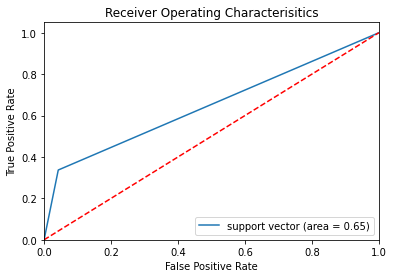

In [81]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

#create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label = 'support vector (area = %0.2f)' % roc_auc)

#diagnol dotted red line
plt.plot([0,1], [0, 1], 'r--') #r for red and -- is for dashed line

#x-axis limitation
plt.xlim([0.0,1.0])

#y-axis limitation
plt.ylim([0.0,1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver Operating Characterisitics')

#print legend on lower right
plt.legend(loc="lower right")

#Save the plot as a image
plt.savefig('Log_ROC')

#print the plot
plt.show()

# Polynomial kernel

In [82]:
#SVC with polynomial (degree 3) kernel
ploy_svc = SVC(kernel='poly', degree=3, C = 1.0)

In [83]:
#ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

ploy_svc.fit(x_train, y_train)

SVC(kernel='poly')

# Making Predictions

In [84]:
pred_test = ploy_svc.predict(x_test)

In [85]:
print('Accuracy of support vector classifier on train set: {:.2f}'.format(ploy_svc.score(x_train,y_train)))

Accuracy of support vector classifier on train set: 0.83


In [86]:
print('Accuracy of support vector classifier on test set: {:.2f}'.format(ploy_svc.score(x_test,y_test)))

Accuracy of support vector classifier on test set: 0.81


# Evaluating the Algorithm

### Confusion Matrix

In [87]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6657  352]
 [1334  657]]


### Classification Report

In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.65      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.64      0.66      9000
weighted avg       0.79      0.81      0.79      9000



### ROC Curve

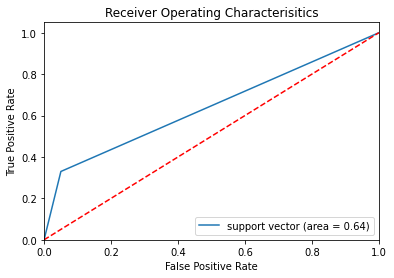

In [89]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

#create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label = 'support vector (area = %0.2f)' % roc_auc)

#diagnol dotted red line
plt.plot([0,1], [0, 1], 'r--') #r for red and -- is for dashed line

#x-axis limitation
plt.xlim([0.0,1.0])

#y-axis limitation
plt.ylim([0.0,1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver Operating Characterisitics')

#print legend on lower right
plt.legend(loc="lower right")

#Save the plot as a image
plt.savefig('Log_ROC')

#print the plot
plt.show()

# Conclusion

In [90]:
df_accuracy = pd.DataFrame({"Linear Kernel":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","AUC Score":"66%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"47%"},
                           "RBF kernel with grid search":{"Accuracy on training data":"82%","Accuracy on testing data":"82%","AUC Score":"65%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"46%"},
                           "Polynomial Kernel":{"Accuracy on training data":"83%","Accuracy on testing data":"81%","AUC Score":"63%","F1 Score for 'No'":"89%","F1 Score for 'Yes'":"43%"}})

In [91]:
df_accuracy = df_accuracy.reindex(["Accuracy on training data", "Accuracy on testing data", "AUC Score", "F1 Score for 'No'", "F1 Score for 'Yes'"])
df_accuracy

,Linear Kernel,RBF kernel with grid search,Polynomial Kernel
Accuracy on training data,82%,82%,83%
Accuracy on testing data,82%,82%,81%
AUC Score,66%,65%,63%
F1 Score for 'No',89%,89%,89%
F1 Score for 'Yes',47%,46%,43%


This dataset is an imbalanced dataset so we consider AUC as our main score and F1 Score is at least greater than 60% for each class.

Each model has AUC Score above 60% but F1 Score for class "Yes" below 60. So none of the model is acceptable to predict the default of the credit card holders.

In [97]:
#count of class of target variable
df.Default_Payment.value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

0 class has 23364 points and 1 class has 6636 points. This simply indicate that our data set is imbalanced.

### Performing SMOTETomek for handling imbalanced dataset and see if we will able to increase accuracy metrics.

In [98]:
from imblearn.combine import SMOTETomek
from collections import Counter
Counter(y_train)

Counter({0: 16355, 1: 4645})

In [99]:
os=SMOTETomek(0.75)
x_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 16355, 1: 4645})
The number of classes after fit Counter({0: 15806, 1: 11717})


## Again Performing Grid Search

In [105]:
grid_search.fit(x_train_ns, y_train_ns)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1]})

### Print best parameter values

In [106]:
#view the accuracy score
print('Best score for data1:', grid_search.best_score_)

Best score for data1: 0.8415882231797731


In [107]:
#view the best parameters for the model found using grid search
print('Best C:', grid_search.best_estimator_.C)
print('Best gamma:', grid_search.best_estimator_.gamma)

Best C: 10
Best gamma: 1


### Build a model using best parameters

In [108]:
model_grid = SVC(kernel='rbf', C=10, gamma=1)

### Training the model 

In [109]:
#ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

model_grid.fit(x_train_ns,y_train_ns)

SVC(C=10, gamma=1)

### Making Predictions

In [110]:
pred_test = model_grid.predict(x_test)

In [111]:
print('Accuracy of support vector classifier on train set: {:.2f}'.format(model_grid.score(x_train_ns,y_train_ns)))
print('Accuracy of support vector classifier on test set: {:.2f}'.format(model_grid.score(x_test,y_test)))

Accuracy of support vector classifier on train set: 0.94
Accuracy of support vector classifier on test set: 0.73


This time we are getting 94% accuracy on train data set and 73% accuracy on test data set. Which means our model is not a generalize model. It is because of overfitting of data points.

### Confusion Matrix

In [112]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix

#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6037  972]
 [1437  554]]


### Classification Report

In [113]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83      7009
           1       0.36      0.28      0.32      1991

    accuracy                           0.73      9000
   macro avg       0.59      0.57      0.57      9000
weighted avg       0.71      0.73      0.72      9000



### Roc

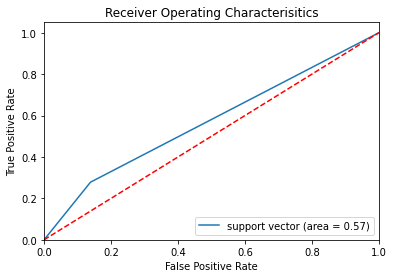

In [114]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#Prediction on test data based on the number of thresholds and calculate the false positive rate and and true positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred_test)

roc_auc = auc(false_positive_rate, true_positive_rate)

#create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(false_positive_rate, true_positive_rate, label = 'support vector (area = %0.2f)' % roc_auc)

#diagnol dotted red line
plt.plot([0,1], [0, 1], 'r--') #r for red and -- is for dashed line

#x-axis limitation
plt.xlim([0.0,1.0])

#y-axis limitation
plt.ylim([0.0,1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver Operating Characterisitics')

#print legend on lower right
plt.legend(loc="lower right")

#Save the plot as a image
plt.savefig('Log_ROC')

#print the plot
plt.show()

After Performing SMOTETOMEK for handling imbalance nature of dataset also we not getting satisfactory result.